<img style="float: right; margin: 0px 0px 15px 15px;" src="https://revistasociosams.com/wp-content/uploads/2021/06/kellogs-6-razones.jpg" width="350px" height="180px" />

# <font color= #653700> Análisis Estadístico Multivariado </font>

- <Strong> `Claudia Celeste Castillejos Jáuregui` </Strong>
- <Strong> `12 mayo 2022`</Strong>
- <Strong> `Practica #6`</Strong>
- <Strong> `claudia.castillejos@iteso.mx` </Strong> 
- <Strong> `Rocio Carrasco Navarro` </Strong> 

### <font color= #653700> Apéndice </font>

- Portada.
- Introducción.
- Descripción de la base de datos.
- Objetivo.
- Desarrollo.
- Resultados
- Conclusiones.

### <font color= #653700> Introducción </font>

En esta práctica utilizaremos un algoritmo de cluster jerarquico (HCluster) y uno no jerarquico (Kmeans) para determinar los grupos optimos que se deberian usar para esta base de datos.

### <font color= #653700> Descripción de la base de datos </font>

El conjunto de datos fue recuperado de la base de datos Kaggle. Incluye 77 registros y 15 columnas.

Variables predictoras:

* Nombre: Nombre del cereal

* tipo:

      - F = frío
      - C = caliente
      
* calorías: calorías por porción

* proteína: gramos de proteína

* grasa: gramos de grasa

* sodio: miligramos de sodio

* fibra: gramos de fibra dietética

* carbo: gramos de carbohidratos complejos

* azúcares: gramos de azúcares

* potasio: miligramos de potasio

* vitaminas: vitaminas y minerales: 0, 25 o 100, lo que indica el porcentaje típico recomendado por la FDA

* estante: estante de exhibición (1, 2 o 3, contando desde el piso)

* peso: peso en onzas de una porción

* tazas: número de tazas en una porción

Variable de respuesta

* mfr: fabricante de cereales

      - A = Productos Alimenticios Caseros Estadounidenses
      - G = molinos generales
      - K = Kelloggs
      - N = Nabisco
      - P = publicación
      - Q = Avena Quaker
      - R = Ralston Purina


### <font color= #653700> Objetivo </font>

El  objetivo  específico  de esta practica  es  agrupar  objetos  por  similitud,  en  grupos  o  conjuntos  de 
manera que los miembros del mismo grupo tengan características similares.

### <font color= #653700> Desarrollo </font>

In [3]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.cluster import hierarchy
import scipy.spatial.distance as sc
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler
plt.rcParams['figure.figsize'] = (8, 8)
plt.style.use('ggplot')

In [4]:
data=pd.read_csv('cereal.csv')
data

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00


In [5]:
data.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
dtype: int64

In [6]:
data.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups'],
      dtype='object')

In [7]:
data['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [8]:
#Reemplazamos por números las clasificaciones de los fabricantes de cereal.
data['mfr'].mask(data['mfr'] == 'N',1,inplace=True)
data['mfr'].mask(data['mfr'] == 'Q',2,inplace=True)
data['mfr'].mask(data['mfr'] == 'K',3,inplace=True)
data['mfr'].mask(data['mfr'] == 'R',4,inplace=True)
data['mfr'].mask(data['mfr'] == 'G',5,inplace=True)
data['mfr'].mask(data['mfr'] == 'P',6,inplace=True)
data['mfr'].mask(data['mfr'] == 'A',7,inplace=True)
#Cambiamos el tipo de variable int64
data['mfr'] =data['mfr'].astype('int64')

In [9]:
# Base de datos
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
0,100% Bran,1,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33
1,100% Natural Bran,2,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00
2,All-Bran,3,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33
3,All-Bran with Extra Fiber,3,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50
4,Almond Delight,4,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75


### <font color= #653700> HCluster </font>

In [10]:
# Los grupos por fabricantes de cereal
res=data.describe()
print(data.groupby('mfr').size())

mfr
1     6
2     8
3    23
4     8
5    22
6     9
7     1
dtype: int64


In [11]:
#Selección de variables
X = np.array(data[["carbo","sugars","potass"]])
y = np.array(data['mfr'])

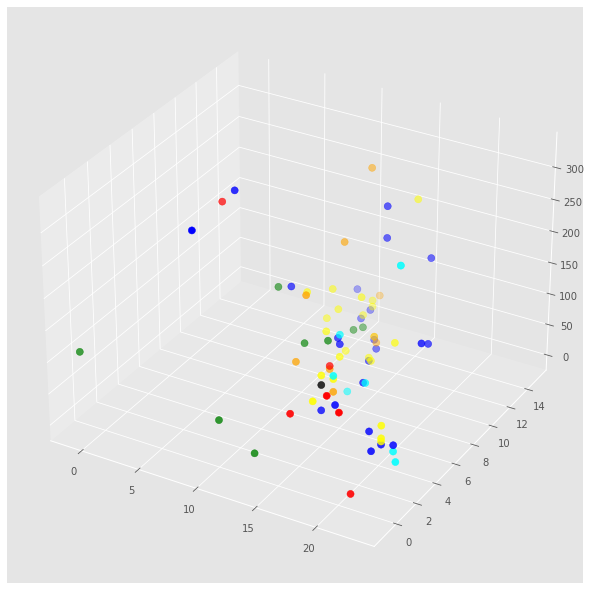

In [12]:
#Gráfica de las variables
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=50)
#Categorías de los famosos

In [13]:
# Clusterig jerarquico scipy
# metric= a la distancia euclidiana 
HC= hierarchy.linkage(X,metric='euclidean',method='complete')

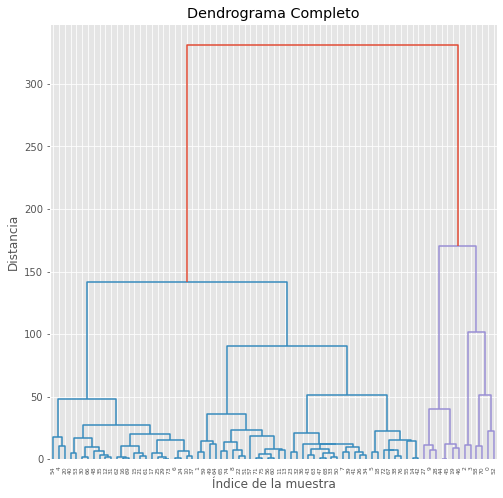

In [14]:
#Dendograma
plt.title('Dendrograma Completo')
plt.xlabel('Índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC)
plt.show()

#### <font color= #653700> Resultados </font>

En este dendrograma podemos determinar el número de cluster que queremos utilizar para separar los datos, en este caso elegí 4

<Figure size 1800x1080 with 0 Axes>

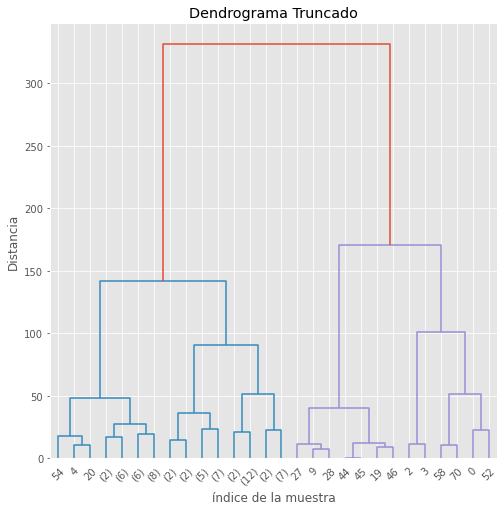

In [15]:
# Modificar el aspecto del dendrograma
plt.figure(figsize=(25,15))
plt.figure()
plt.title('Dendrograma Truncado')
plt.xlabel('índice de la muestra')
plt.ylabel('Distancia')
dn = hierarchy.dendrogram(HC, truncate_mode='level',p=4)
plt.show()

#### <font color= #653700> Resultados </font>

En este dendograma truncado vemos más de cerca la cantidad de cluster que elegí en el dendograma pasado

In [16]:
# Sacamos el clustering jerárquico sklearn
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')  
grupos=cluster.fit_predict(X)

In [18]:
# data.describe() = res esta definido en la parte de arriba 
res

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,3.818182,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,1.510727,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,3.000000,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,4.000000,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,5.000000,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,7.000000,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [17]:
#Extraer los elementos de cada clúster
#Cluster 1
idx_0 = grupos==0
subdata_0 = pd.DataFrame(X[idx_0])
res_0=subdata_0.describe()
res_0

,0,1,2
count,6.00,6.000000,6.000000
mean,10.00,8.500000,276.666667
std,4.00,5.718391,41.311822
min,5.00,0.000000,230.000000
25%,7.25,5.250000,245.000000
50%,9.50,9.000000,270.000000
75%,13.25,13.500000,310.000000
max,15.00,14.000000,330.000000


In [19]:
pd.value_counts(data['mfr'][idx_0])

3    3
1    1
6    1
5    1
Name: mfr, dtype: int64

#### <font color= #653700> Resultados </font>

Esto nos dice que de los tipos de fabricantes de cereal cuales estan en este grupo:

De Kelloggs son 3, Nabisco son 1,Publicación son 6 y Molinos Generales 1

In [20]:
# Son los nombres de los cereales de ese grupo 
pd.value_counts(data['name'][idx_0])

100% Bran                    1
All-Bran                     1
All-Bran with Extra Fiber    1
Post Nat. Raisin Bran        1
Raisin Bran                  1
Total Raisin Bran            1
Name: name, dtype: int64

In [21]:
#Cluster 2
idx_1 = grupos==1
subdata_1 =pd.DataFrame(X[idx_1])
res_1=subdata_1.describe()
res_1

,0,1,2
count,39.000000,39.000000,39.000000
mean,14.641026,5.589744,95.641026
std,4.078101,3.711419,25.083531
min,-1.000000,-1.000000,50.000000
25%,12.000000,3.000000,82.500000
50%,15.000000,6.000000,95.000000
75%,17.000000,8.000000,110.000000
max,21.000000,13.000000,140.000000


In [22]:
pd.value_counts(data['mfr'][idx_1])

5    16
3     7
2     5
1     4
4     3
6     3
7     1
Name: mfr, dtype: int64

#### <font color= #653700> Resultados </font>

Esto nos dice que de los tipos de fabricantes de cereal cuales estan en este grupo:

De Molinos Generales son 16, Kellogs son 7, Avena Quaker son 5, Nabisco es 4,Ralston Purina son 3, Publicación son 3 y Productos Alimenticios Caseros Estadounidenses es 1

In [23]:
# Son los nombres de los cereales de ese grupo 
pd.value_counts(data['name'][idx_1])

100% Natural Bran              1
Shredded Wheat                 1
Nutri-grain Wheat              1
Oatmeal Raisin Crisp           1
Puffed Wheat                   1
Quaker Oat Squares             1
Quaker Oatmeal                 1
Raisin Nut Bran                1
Raisin Squares                 1
Shredded Wheat 'n'Bran         1
Multi-Grain Cheerios           1
Shredded Wheat spoon size      1
Special K                      1
Strawberry Fruit Wheats        1
Total Whole Grain              1
Triples                        1
Wheat Chex                     1
Wheaties                       1
Nutri-Grain Almond-Raisin      1
Maypo                          1
Apple Cinnamon Cheerios        1
Double Chex                    1
Basic 4                        1
Bran Chex                      1
Cheerios                       1
Clusters                       1
Cocoa Puffs                    1
Count Chocula                  1
Crispy Wheat & Raisins         1
Frosted Mini-Wheats            1
Lucky Char

In [22]:
#Cluster 3
idx_2 = grupos==2
subdata_2 = pd.DataFrame(X[idx_2])
res_2=subdata_2.describe()
res_2

,0,1,2
count,7.000000,7.000000,7.000000
mean,14.000000,9.857143,177.142857
std,2.516611,2.853569,16.035675
min,10.000000,5.000000,160.000000
25%,12.500000,8.500000,165.000000
50%,14.000000,11.000000,170.000000
75%,16.000000,11.500000,190.000000
max,17.000000,13.000000,200.000000


In [23]:
pd.value_counts(data['mfr'][idx_2])

3    3
6    2
4    2
Name: mfr, dtype: int64

#### <font color= #653700> Resultados </font>

Esto nos dice que de los tipos de fabricantes de cereal cuales estan en este grupo:

Kelloggs son 3, Publicación son 2 y Ralston Purina son 2

In [24]:
# Son los nombres de los cereales de ese grupo 
pd.value_counts(data['name'][idx_2])

Bran Flakes                               1
Cracklin' Oat Bran                        1
Fruit & Fibre Dates; Walnuts; and Oats    1
Fruitful Bran                             1
Muesli Raisins; Dates; & Almonds          1
Muesli Raisins; Peaches; & Pecans         1
Mueslix Crispy Blend                      1
Name: name, dtype: int64

In [25]:
#Cluster 4
idx_3 = grupos==3
subdata_3 = pd.DataFrame(X[idx_3])
res_3 =subdata_3.describe()
res_3

,0,1,2
count,25.000000,25.000000,25.000000
mean,15.800000,7.800000,30.720000
std,4.453463,5.008326,12.515058
min,9.000000,0.000000,-1.000000
25%,13.000000,3.000000,25.000000
50%,14.000000,9.000000,35.000000
75%,21.000000,12.000000,40.000000
max,23.000000,15.000000,45.000000


In [26]:
pd.value_counts(data['mfr'][idx_3])

3    10
5     5
4     3
2     3
6     3
1     1
Name: mfr, dtype: int64

#### <font color= #653700> Resultados </font>

Esto nos dice que de los tipos de fabricantes de cereal cuales estan en este grupo:

Kelloggs son 10, Molinos Generales son 5, Ralston Purina son 3, Avena Quaker son 3, Publicación 3 y Nabisco  solo 1

In [27]:
# Son los nombres de los cereales de ese grupo 
pd.value_counts(data['name'][idx_3])

Almond Delight            1
Golden Grahams            1
Total Corn Flakes         1
Smacks                    1
Rice Krispies             1
Rice Chex                 1
Puffed Rice               1
Product 19                1
Nut&Honey Crunch          1
Kix                       1
Honey-comb                1
Honey Graham Ohs          1
Golden Crisp              1
Apple Jacks               1
Fruity Pebbles            1
Frosted Flakes            1
Froot Loops               1
Crispix                   1
Cream of Wheat (Quick)    1
Corn Pops                 1
Corn Flakes               1
Corn Chex                 1
Cinnamon Toast Crunch     1
Cap'n'Crunch              1
Trix                      1
Name: name, dtype: int64

### <font color= #653700> Kmeans </font>

In [28]:
# Cargamos la base de datos
res1 =data.describe()
res1

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,3.818182,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039
std,1.510727,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716
min,1.000000,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000
25%,3.000000,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000
50%,4.000000,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000
75%,5.000000,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000
max,7.000000,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000


In [29]:
#Selección de variables
X=data.iloc[:,8:11]
X

,carbo,sugars,potass
0,5.0,6,280
1,8.0,8,135
2,7.0,5,320
3,8.0,0,330
4,14.0,8,-1
...,...,...,...
72,21.0,3,60
73,13.0,12,25
74,17.0,3,115
75,17.0,3,110


In [30]:
#%% Escalar los datos
scaler=MinMaxScaler()
scaler.fit(X)
scaled_data=scaler.transform(X)

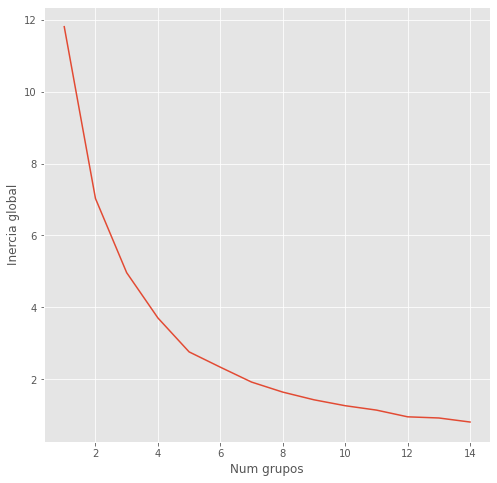

In [31]:
# Obtener el número ideal de clústers
# Método de codo
inercias = np.zeros(15)
for k in np.arange(1,15):
    model = KMeans(n_clusters=k,init='random')
    model = model.fit(scaled_data)
    inercias[k] = model.inertia_
    
plt.plot(np.arange(1,15),inercias[1:])
plt.xlabel('Num grupos')
plt.ylabel('Inercia global')
plt.show()

#### <font color= #653700> Resultados: </font>
El cluster óptimo según el diagrama de codo es de 4

[[0.79017857 0.22098214 0.21223565]
 [0.55833333 0.784375   0.12598187]
 [0.23958333 0.21875    0.78851964]
 [0.63166667 0.615      0.43867069]]


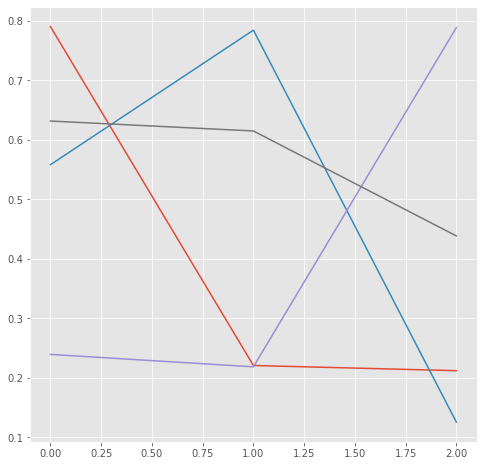

In [32]:
#%% Algoritmo de cluster
kmeans = KMeans(n_clusters=4,init='k-means++').fit(scaled_data)
#init='random'
#init='ndarray'
centroides = kmeans.cluster_centers_
print(centroides)
plt.plot(centroides.T)

#### <font color= #653700> Resultados: </font>

En esta gráfica muestra los 4 grupos que se generaron:

* El rojo es  muy alto en carbohibratos, muy bajo en azucares y muy bajo en potasio

* El azul es alto en carbohidratos, muy alto en azucares y  muy bajo en potasio

* El morado es muy bajo en carbohidratos, muy bajo en azucares y muy alto en potasio

* El negro es alto en carbohidratos, alto en azucares y bajo en potasio

In [33]:
#%% Gráfica con los 3 clústers
# Predecir los clústers
#Nos dice que observación pertenece a cada grupo
grupos = kmeans.predict(scaled_data)

In [34]:
#Extraer los elementos de cada clúster
#Cluster 1 (Rojo)
idx_0 = grupos==0
subdata_0 = X[idx_0]
res_0=subdata_0.describe()
pd.value_counts(data['name'][idx_0])
# Cereales de este grupo

Cheerios                       1
Corn Chex                      1
Wheat Chex                     1
Triples                        1
Total Whole Grain              1
Total Corn Flakes              1
Strawberry Fruit Wheats        1
Special K                      1
Shredded Wheat spoon size      1
Shredded Wheat 'n'Bran         1
Shredded Wheat                 1
Rice Krispies                  1
Rice Chex                      1
Puffed Wheat                   1
Puffed Rice                    1
Product 19                     1
Nutri-grain Wheat              1
Maypo                          1
Kix                            1
Just Right Crunchy  Nuggets    1
Great Grains Pecan             1
Grape-Nuts                     1
Grape Nuts Flakes              1
Double Chex                    1
Crispix                        1
Cream of Wheat (Quick)         1
Corn Flakes                    1
Wheaties                       1
Name: name, dtype: int64

In [35]:
#Cluster 2 (Azul)
idx_1 = grupos==1
subdata_1 = X[idx_1]
res_1=subdata_1.describe()
pd.value_counts(data['name'][idx_1])
# Cereales de este grupo

Almond Delight             1
Apple Cinnamon Cheerios    1
Smacks                     1
Nut&Honey Crunch           1
Lucky Charms               1
Honey-comb                 1
Honey Nut Cheerios         1
Honey Graham Ohs           1
Golden Grahams             1
Golden Crisp               1
Fruity Pebbles             1
Frosted Flakes             1
Froot Loops                1
Count Chocula              1
Corn Pops                  1
Cocoa Puffs                1
Cinnamon Toast Crunch      1
Cap'n'Crunch               1
Apple Jacks                1
Trix                       1
Name: name, dtype: int64

In [36]:
#Cluster 3 (Morado)
idx_2 = grupos==2
subdata_2 = X[idx_2]
res_2=subdata_2.describe()
pd.value_counts(data['name'][idx_2])
# Cereales de este grupo

100% Bran                    1
All-Bran                     1
All-Bran with Extra Fiber    1
Quaker Oatmeal               1
Name: name, dtype: int64

In [37]:
#Cluster 4 (Negro)
idx_3 = grupos==3
subdata_3 = X[idx_3]
res_3=subdata_3.describe()
pd.value_counts(data['name'][idx_3])
# Cereales de este grupo

100% Natural Bran                         1
Muesli Raisins; Peaches; & Pecans         1
Total Raisin Bran                         1
Raisin Squares                            1
Raisin Nut Bran                           1
Raisin Bran                               1
Quaker Oat Squares                        1
Post Nat. Raisin Bran                     1
Oatmeal Raisin Crisp                      1
Nutri-Grain Almond-Raisin                 1
Multi-Grain Cheerios                      1
Mueslix Crispy Blend                      1
Muesli Raisins; Dates; & Almonds          1
Basic 4                                   1
Life                                      1
Just Right Fruit & Nut                    1
Fruitful Bran                             1
Fruit & Fibre Dates; Walnuts; and Oats    1
Frosted Mini-Wheats                       1
Crispy Wheat & Raisins                    1
Cracklin' Oat Bran                        1
Clusters                                  1
Bran Flakes                     

In [38]:
#Observaciones que están más cerca del centroide.
#Estados característicos que representan al cluster
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, scaled_data)
closest

array([50, 10,  0, 51], dtype=int64)

In [39]:
#Nombres de los cereales más cercanos al centroide.
state=data['name'].values 
for row in closest:
    print(state[row])

Nutri-grain Wheat
Cap'n'Crunch
100% Bran
Oatmeal Raisin Crisp


### <font color= #653700> Conclusión: </font>

Los resultados de los clusters jerarquico y no jerarquico apesar de que tomamos el mismo número de cluster no generaron los mismos grupos, so por que los algoritmos funcionan de distintas maneras.

Cluster y Intepretación de los dos métodos:

HCluster:

* Cluster 1: la media de la variable azucares es más grande que la media de los datos originales, la de los carbohidratos es menor que la media original y la media del potasio es más que el doble de la media original 

* Cluster 2:la media de las variables azucares y potasio es menor que la media de los datos originales y la de los carbohidratos es mayor que la media original.

* Cluster 3:la media de las variables potasio y azucares es más grande que la media de los datos originales y la de los carbohidratos es menor que la media original.

* Cluster 4: la media de las variables carbohidratos y azucares es mas grande que la media de los datos originales y la media para la variable potasio es menor que la media original de todos los datos.

Kmeans: 

* Cluster 1: es muy alto en carbohidratos, muy bajo en azucares y muy bajo en potasio.

* Cluster 2: es alto en carbohidratos, muy alto en azucares y muy bajo en potasio.

* Cluster 3: es muy bajo en carbohidratos, muy bajo en azucares y muy alto en potasio.

* Cluster 4: es alto en carbohidratos, alto en azucares y bajo en potasio.
